In [11]:
path=("/home/kakashi/Downloads/C7_R3_data.csv")
import pandas as pd
df= pd.read_csv(path)
df.head()

,State Name,Survey Area Type,Household_Fixed,Count
0,UTTARAKHAND,Rural,Commercial,122282
1,UTTAR PRADESH,Rural,Commercial,2243373
2,TRIPURA,Rural,Commercial,94392
3,TELANGANA,Rural,Commercial,179643
4,TAMIL NADU,Rural,Commercial,208558


In [12]:
df.shape

(137, 4)

In [13]:
df.describe()

,Count
count,1.370000e+02
mean,3.052347e+05
std,5.211897e+05
min,3.000000e+00
25%,1.133800e+04
50%,1.188190e+05
75%,3.582810e+05
max,3.804108e+06


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State Name        134 non-null    object
 1   Survey Area Type  137 non-null    object
 2   Household_Fixed   137 non-null    object
 3   Count             137 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 4.4+ KB


In [18]:
df.drop(columns=['Household_Fixed'],inplace=True)
df.head()

,State Name,Survey Area Type,Count
0,UTTARAKHAND,Rural,122282
1,UTTAR PRADESH,Rural,2243373
2,TRIPURA,Rural,94392
3,TELANGANA,Rural,179643
4,TAMIL NADU,Rural,208558


In [29]:
missing_data=df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

State Name
False    134
True       3
Name: State Name, dtype: int64

Survey Area Type
False    137
Name: Survey Area Type, dtype: int64

Count
False    137
Name: Count, dtype: int64



In [31]:
Count_mean = df['Count'].astype('float').mean(axis=0)
print(Count_mean)

305234.71532846714


In [32]:
dummy_variable_1 = pd.get_dummies(df["Survey Area Type"])
dummy_variable_1.head()

,Rural,Urban
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [33]:
dummy_variable_1.rename(columns={'Survey Area Type':'Rural', 'Survey Area Type':'Urban'}, inplace=True)
dummy_variable_1.head()


,Rural,Urban
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [34]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("Survey Area Type", axis = 1, inplace=True)
df.head()

,State Name,Count,Rural,Urban
0,UTTARAKHAND,122282,1,0
1,UTTAR PRADESH,2243373,1,0
2,TRIPURA,94392,1,0
3,TELANGANA,179643,1,0
4,TAMIL NADU,208558,1,0


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(0, 3994313.26669426)

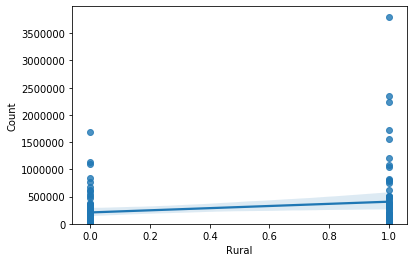

In [36]:
sns.regplot(x="Rural", y="Count", data=df)
plt.ylim(0,)


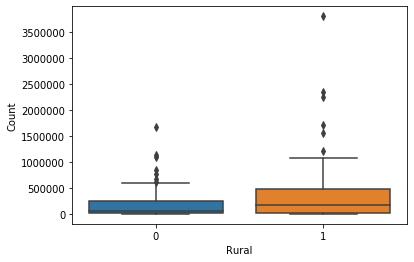

In [37]:
sns.boxplot(x="Rural", y="Count", data=df)

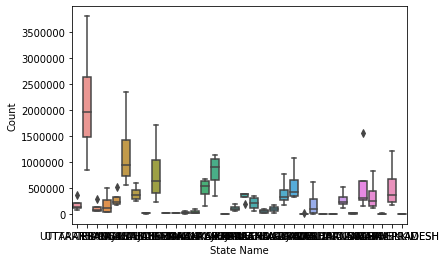

In [38]:
sns.boxplot(x="State Name", y="Count", data=df)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

X = df[['Rural']]
Y = df['Count']

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]

lm.intercept_
lm.coef_


array([197413.29232409])